In [1]:
import numpy as np
import matplotlib.pyplot as plt
import patsy
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


In [13]:
df = pd.read_csv('movie.csv' , sep=';')

In [14]:
df.head()

,Title,Id,Budget,Release_date,Revenue,Runtime,Vote_count
0,Avatar,19995,237000000,2009.0,2.787965e+09,1620.0,11800.0
1,Pirates of the Caribbean: At World's End,285,300000000,2007.0,9.610000e+08,1690.0,4500.0
2,Spectre,206647,245000000,2015.0,8.806746e+08,1480.0,4466.0
3,The Dark Knight Rises,49026,250000000,2012.0,1.084939e+09,1650.0,9106.0
4,John Carter,49529,260000000,2012.0,2.841391e+08,1320.0,2124.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4794 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         4794 non-null   object 
 1   Id            4794 non-null   int64  
 2   Budget        4794 non-null   int64  
 3   Release_date  4794 non-null   float64
 4   Revenue       4794 non-null   float64
 5   Runtime       4794 non-null   float64
 6   Vote_count    4794 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 299.6+ KB


In [16]:
df.dropna(inplace=True)
df.drop_duplicates(subset='Title', keep='first', inplace=True)


In [19]:
df.drop(['Title' ], axis=1, inplace=True)

In [20]:
df.corr()

,Id,Budget,Release_date,Revenue,Runtime,Vote_count
Id,1.000000,-0.088795,0.434951,-0.049712,-0.150693,-0.003050
Budget,-0.088795,1.000000,0.169022,0.730717,0.269659,0.592981
Release_date,0.434951,0.169022,1.000000,0.090147,-0.167164,0.114309
Revenue,-0.049712,0.730717,0.090147,1.000000,0.251046,0.781399
Runtime,-0.150693,0.269659,-0.167164,0.251046,1.000000,0.271932
Vote_count,-0.003050,0.592981,0.114309,0.781399,0.271932,1.000000


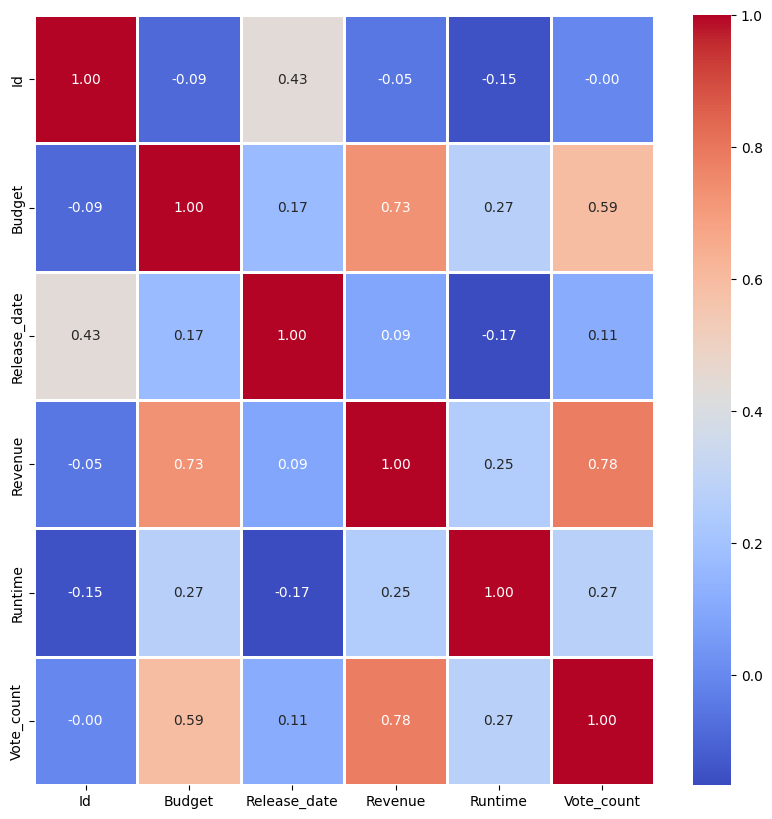

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [22]:
import statsmodels.api as sm
X = df.drop('Revenue' ,axis=1)
y = df.loc[:,'Revenue']
new_model = sm.OLS(y, X).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Revenue   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                              3354.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                        0.00
Time:                        21:28:31   Log-Likelihood:                         -94392.
No. Observations:                4794   AIC:                                  1.888e+05
Df Residuals:                    4789   BIC:                                  1.888e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Id             -22.7567     14.364     -1.584      0.113     -50.917       5.403
Budget           1.6485      0.038     42.891      0.000       1.573       1.724
Release_date -3820.0360   3158.364     -1.209      0.227      -1e+04    2371.808
Runtime      -5445.2372   5812.520     -0.937      0.349   -1.68e+04    5949.973
Vote_count    7.112e+04   1267.802     56.101      0.000    6.86e+04    7.36e+04
==============================================================================
Omnibus:                     3649.531   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331881.564
Skew:                           2.953   Prob(JB):                         0.00
Kurtosis:                      43.331   Cond. No.                     2.65e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""